In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from statsmodels.tsa.seasonal import seasonal_decompose


In [50]:
df = pd.read_csv('./data/SMK25-N25-Q25.csv')
str_detail = "SMK25-N25-Q25"

In [51]:
def trend_finder(year):
    temp1 = df[f'Timestamp.{year}']
    temp2 = df[year]
    temp_df = pd.DataFrame({'Timestamp': temp1, 'Value': temp2})

    temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'], errors='coerce')
    temp_df = temp_df.dropna(subset=['Timestamp'])

    # Group by year and month
    grouped = temp_df.groupby(temp_df['Timestamp'].dt.to_period('M'))

    # Calculate the median for each group
    median_values = grouped['Value'].median().reset_index()

    # Rename columns for clarity
    median_values.columns = ['Period',year]

    return median_values


In [52]:
def fill_nan_with_row_median(row):
    numeric_columns = row[1:].astype(float)  # Ensure numeric columns are float
    median = numeric_columns.median()        # Calculate the median of the row
    filled_row = numeric_columns.fillna(median)  # Fill NaNs with the median
    row.update(filled_row)                   # Update the original row
    return row

In [53]:
# trend_finder('2009')  

In [59]:
main_df = trend_finder('2010')
main_df = main_df[['Period']]

for i in range(2009, 2025):
    result = trend_finder(str(i))
    main_df[i] = result[str(i)]
    # main_df.fillna(0, inplace=True)
    # print(result)

main_df.iloc[:, 1:] = main_df.iloc[:, 1:].apply(lambda row: fill_nan_with_row_median(row), axis=1)

if pd.api.types.is_period_dtype(main_df['Period']):
    main_df['Period'] = main_df['Period'].dt.to_timestamp()
    
main_df['Period'] = pd.to_datetime(main_df['Period'])
main_df.set_index('Period', inplace=True)

main_df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Period,,,,,,,,,,,,,,,,
2008-03-01,NaN,-0.150,-0.15,14.00,0.00,0.00,-10.30,0.0,0.00,-3.30,0.80,-1.50,-2.90,-0.15,-1.90,-0.30
2008-04-01,NaN,-0.400,-0.40,14.00,0.00,-2.00,-10.30,0.0,0.00,-3.25,1.20,1.50,-2.90,-0.40,-1.90,-0.80
2008-05-01,NaN,0.000,0.00,14.00,0.00,-2.50,-10.30,0.0,0.00,-0.90,1.10,1.00,-2.90,0.00,-1.00,0.00
2008-06-01,NaN,0.000,0.00,2.30,0.00,1.40,-1.80,0.0,-0.90,0.55,0.60,-2.15,-2.90,-0.80,-1.70,0.60
2008-07-01,NaN,0.000,0.00,2.30,0.00,1.40,-1.80,0.0,0.60,-1.10,0.00,-4.10,-1.90,0.90,-2.20,-0.40
2008-08-01,NaN,-0.600,0.00,2.30,0.00,7.80,-1.80,-0.7,-0.20,-0.50,-0.90,-5.60,-1.50,-2.50,-2.50,0.30
2008-09-01,NaN,-1.525,0.00,2.30,0.00,7.80,-1.20,-0.7,-1.55,-2.30,-1.80,-3.45,-1.55,-2.30,-3.10,-1.50
2008-10-01,NaN,-1.400,0.00,2.30,-2.00,1.60,-1.20,-1.1,-1.50,-1.30,-1.80,-3.10,0.30,-2.25,-2.60,-2.70
2008-11-01,NaN,0.000,0.00,0.00,1.00,2.90,-2.60,-1.4,-0.80,-1.20,-1.80,-3.00,-1.55,-2.10,-2.70,-2.40


In [55]:
# df_transposed = main_df.T
# plt.figure(figsize=(12, 8))
# for year in df_transposed.index:
#     plt.plot(df_transposed.columns, df_transposed.loc[year], label=year)

# plt.xlabel('Period')
# plt.ylabel('Values')
# plt.title('Yearly Data Plot')
# plt.legend(title='Year')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [56]:
def plot_trend(main_df,year):
    decomposition = seasonal_decompose(main_df[year], model='additive', period=1)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.figure(figsize=(10, 6))
    plt.suptitle(str_detail+" "+str(year))
    plt.subplot(411)
    plt.plot(main_df[year], label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    # plt.subplot(413)
    # plt.plot(seasonal, label='Seasonality')
    # plt.legend(loc='best')
    # plt.subplot(414)
    # plt.plot(residual, label='Residuals')
    # plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


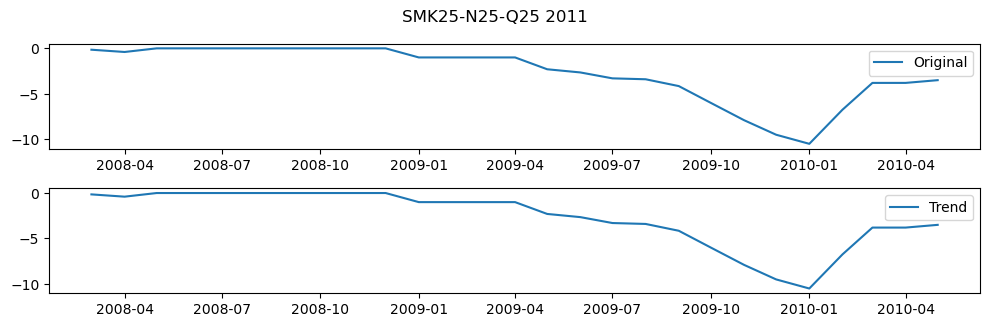

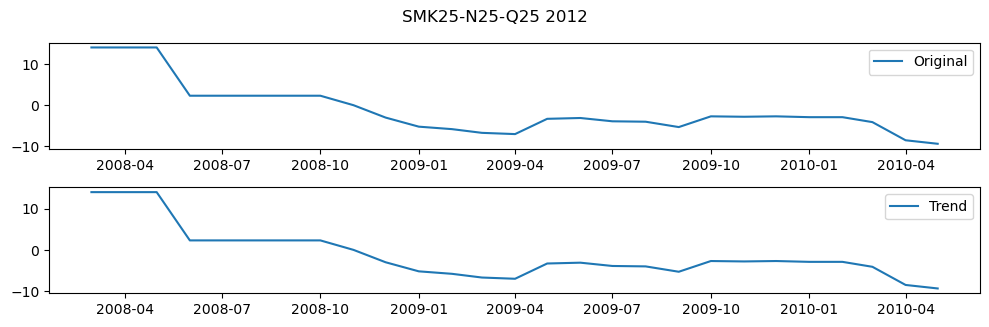

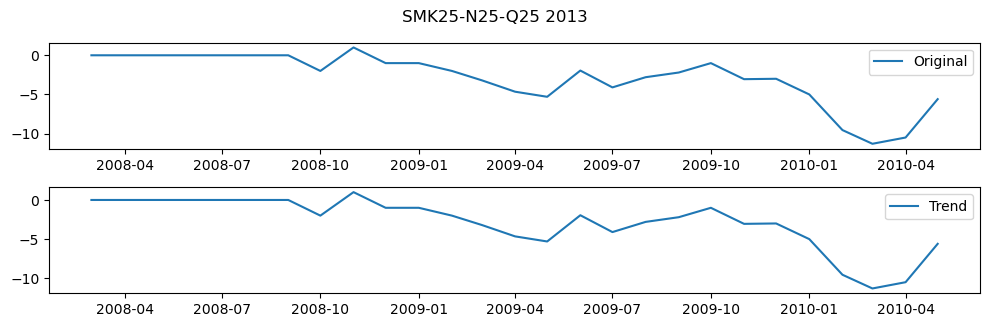

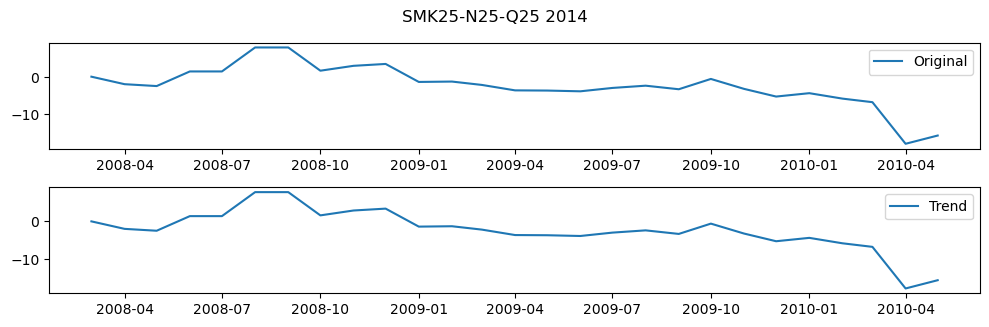

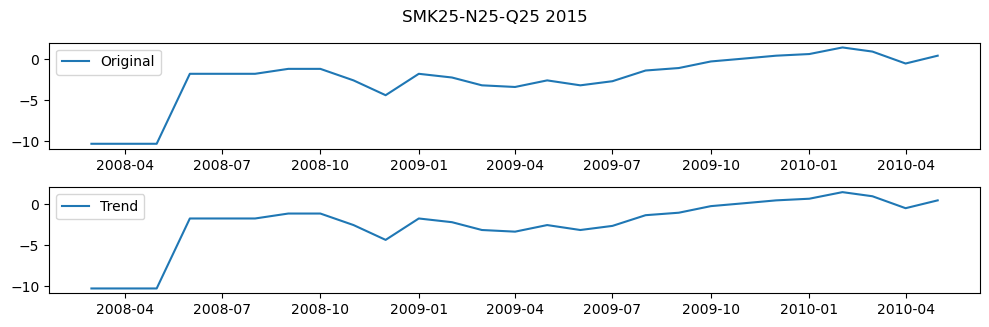

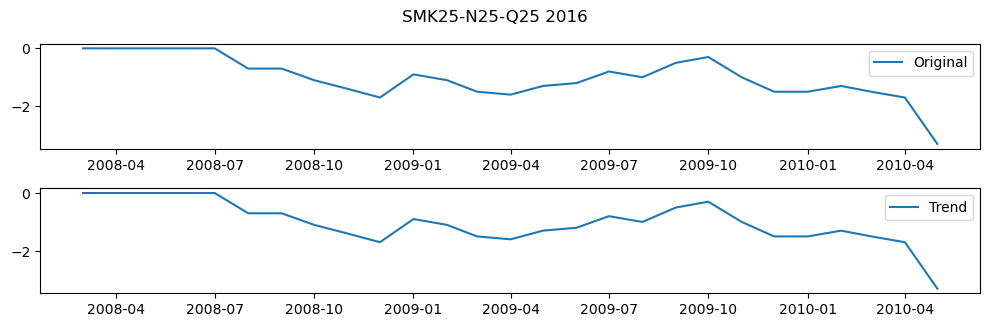

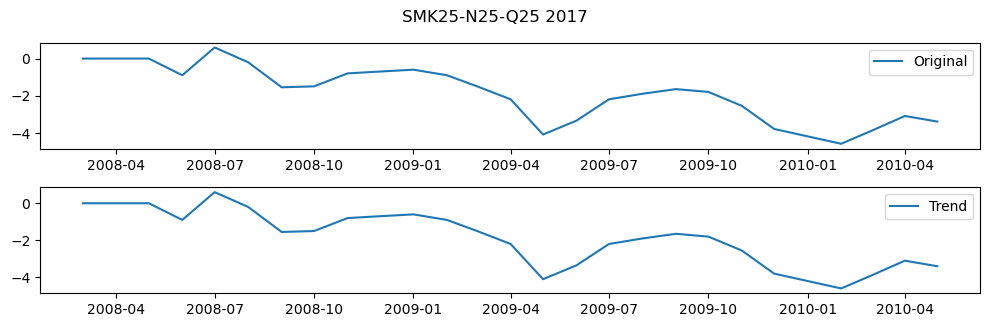

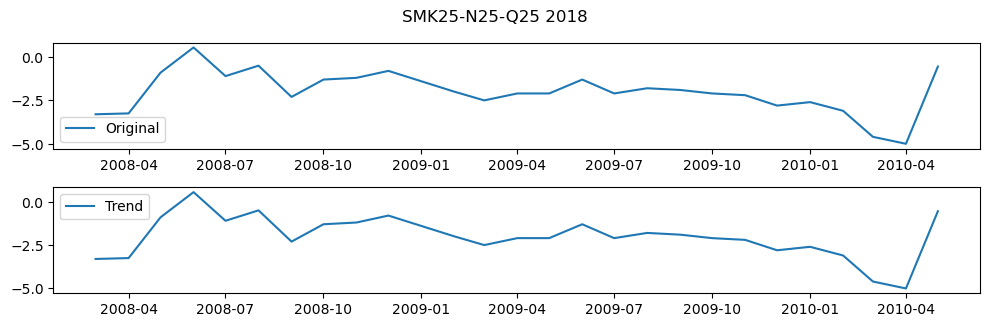

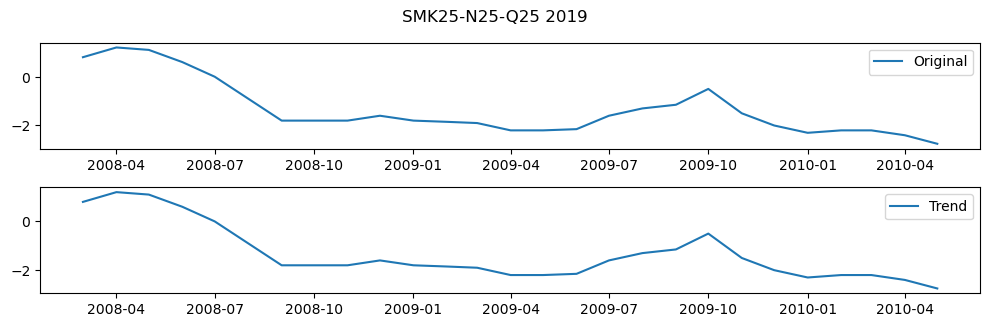

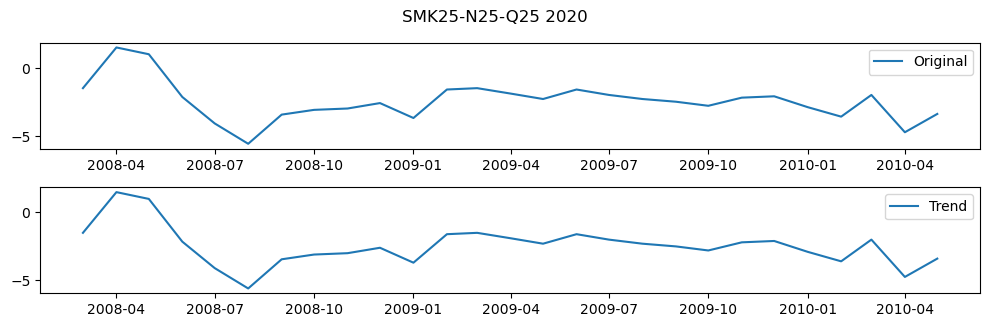

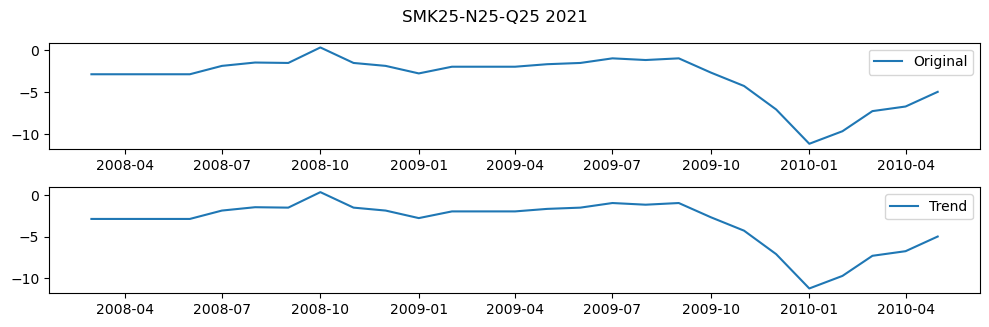

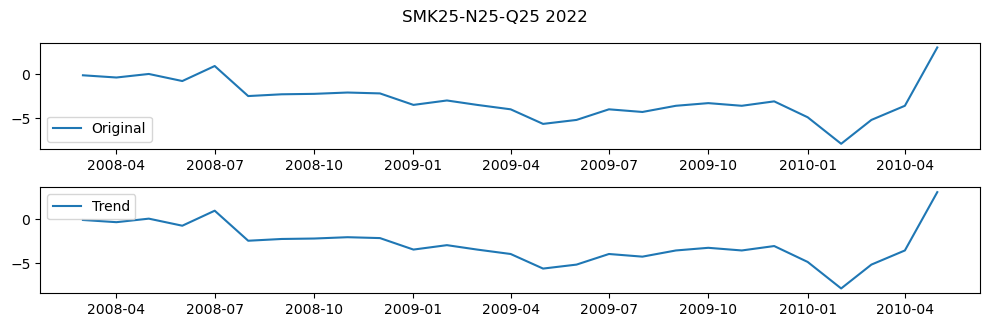

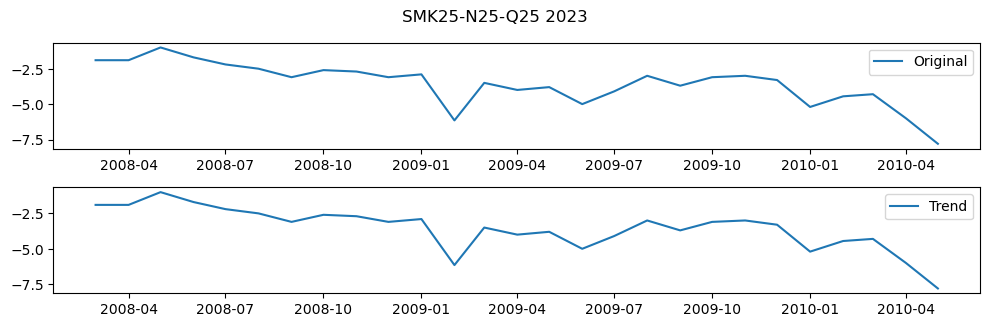

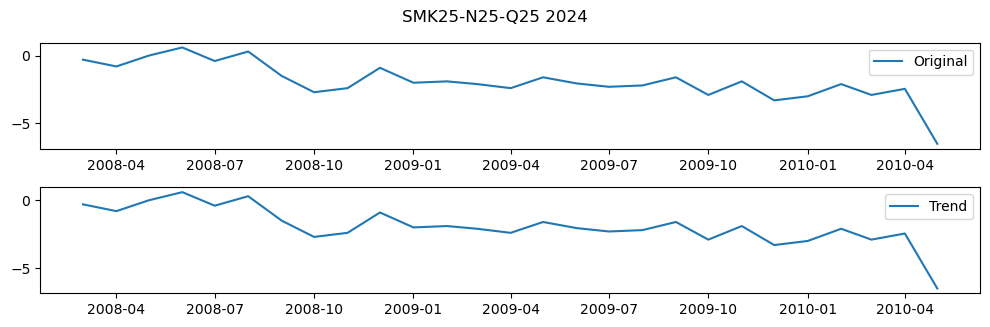

In [60]:
for i in range(2011,2025):
    plot_trend(main_df,i)

In [ ]:
def extract_yearly_highs_lows(file_path, drop_na=True):
    # Load the CSV file
    data = pd.read_csv(file_path)
    # Initialize a dictionary to store the results
    yearly_stats = {}
    # Extract the range of years from the columns
    years = range(2004, 2025)
    # Iterate through each year
    for year in years:
        date_col = f'Timestamp.{year}'
        price_col = str(year)
        # Check if the expected columns are present
        if date_col in data.columns and price_col in data.columns:
            # Handle missing values in the timestamps
            if drop_na:
                year_data = data[[date_col, price_col]].dropna()
            else:
                year_data = data[[date_col, price_col]].fillna({date_col: 0}).dropna(subset=[price_col])
            if not year_data.empty:
                # Find the highest and lowest prices and their corresponding dates
                max_price = year_data[price_col].max()
                min_price = year_data[price_col].min()
                max_date = year_data[date_col][year_data[price_col] == max_price].values[0]
                min_date = year_data[date_col][year_data[price_col] == min_price].values[0]
                # Store the results in the dictionary
                yearly_stats[year] = {
                    'max_price': max_price,
                    'max_date': max_date,
                    'min_price': min_price,
                    'min_date': min_date
                }
        else:
            print(f"Columns for the year {year} are missing in the data")
    # Convert the dictionary to a DataFrame
    yearly_stats_df = pd.DataFrame(yearly_stats).transpose()
    yearly_stats_df.reset_index(inplace=True)
    yearly_stats_df.columns = ['Year', 'Max Price', 'Max Date', 'Min Price', 'Min Date']
    # Ensure the columns are of numeric type
    yearly_stats_df['Year'] = pd.to_numeric(yearly_stats_df['Year'])
    yearly_stats_df['Max Price'] = pd.to_numeric(yearly_stats_df['Max Price'])
    yearly_stats_df['Min Price'] = pd.to_numeric(yearly_stats_df['Min Price'])
    # Create interleaved lists of years and prices
    interleaved_years = []
    interleaved_prices = []
    for i, row in yearly_stats_df.iterrows():
        interleaved_years.extend([row['Year'], row['Year']])
        interleaved_prices.extend([row['Min Price'], row['Max Price']])
    # Calculate regression lines
    x = yearly_stats_df['Year']
    y_max = yearly_stats_df['Max Price']
    y_min = yearly_stats_df['Min Price']
    # Fit regression lines
    z_max = np.polyfit(x, y_max, 1)
    p_max = np.poly1d(z_max)
    z_min = np.polyfit(x, y_min, 1)
    p_min = np.poly1d(z_min)
    # Create the interactive plot
    fig = go.Figure()
    # Add trace for interleaved highs and lows
    fig.add_trace(go.Scatter(x=interleaved_years, y=interleaved_prices, mode='lines+markers', name='Interleaved Highs and Lows'))
    # Add trace for highs
    fig.add_trace(go.Scatter(x=yearly_stats_df['Year'], y=yearly_stats_df['Max Price'], mode='lines+markers', name='Max Prices'))
    # Add trace for lows
    fig.add_trace(go.Scatter(x=yearly_stats_df['Year'], y=yearly_stats_df['Min Price'], mode='lines+markers', name='Min Prices'))
    # Add regression lines
    fig.add_trace(go.Scatter(x=x, y=p_max(x), mode='lines', name='Regression Line for Highs', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=x, y=p_min(x), mode='lines', name='Regression Line for Lows', line=dict(color='blue')))
    # Add labels and title
    fig.update_layout(title='Yearly Highs and Lows with Regression Lines',
                      xaxis_title='Year',
                      yaxis_title='Price',
                      showlegend=True)
    # Show the plot
    fig.show()
    return yearly_stats_df

In [ ]:
extract_yearly_highs_lows('./data/SMK25-N25-Q25.csv')

,Year,Max Price,Max Date,Min Price,Min Date
0,2004,10.00,2004-03-18,-0.75,2004-06-04
1,2005,37.50,2004-05-20,-9.25,2004-06-25
2,2006,12.50,2005-07-06,-21.25,2005-05-19
3,2007,17.50,2006-10-06,-17.00,2007-06-14
4,2008,34.00,2008-02-27,-23.50,2008-03-14
5,2009,112.00,2008-03-11,-11.00,2008-04-03
6,2010,24.25,2009-06-19,-82.00,2009-04-28
7,2011,38.50,2011-07-08,-30.75,2010-03-15
8,2012,12.50,2011-06-29,-6.50,2011-10-28
9,2013,46.25,2012-05-01,-73.50,2012-03-29
